## Importing the necessary libraries

In [105]:
import re
import numpy as np #for data related works
import pandas as pd #for data cleaning
import matplotlib.pyplot as plt #for creating charts
import seaborn as sns

## processing data

In [106]:
df = pd.read_csv("studentsimulated_data.csv")

df.describe() #it describe data
df.info() #it shows about each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  100 non-null    int64  
 1   special_challenge           100 non-null    object 
 2   student_type                100 non-null    object 
 3   nationality                 100 non-null    object 
 4   levelofstudy                100 non-null    object 
 5   year_duration               100 non-null    object 
 6   gender_identity             100 non-null    object 
 7   accomodation_type           100 non-null    object 
 8   funding                     100 non-null    object 
 9   parttime_income             100 non-null    float64
 10  other_income                100 non-null    float64
 11  age                         100 non-null    object 
 12  cost_living                 100 non-null    object 
 13  groceries                   100 non-

## making the visualization

In [107]:
def remove_value(done,val):
    jusval = done[done != val]
    return jusval
    

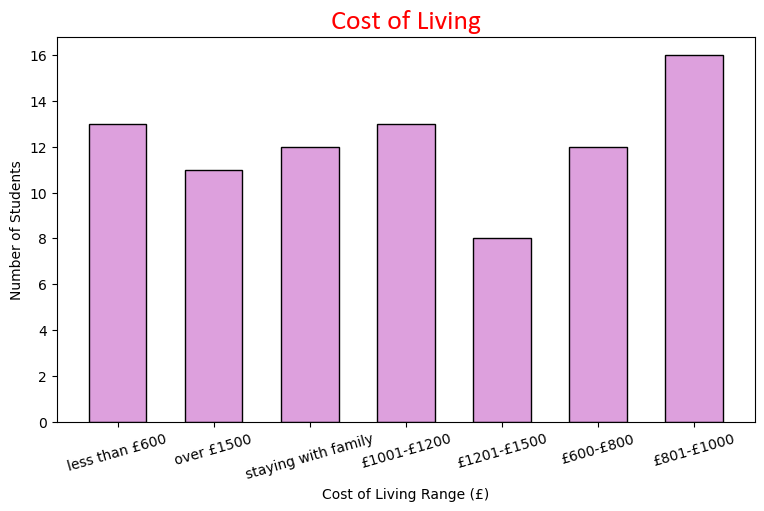

In [108]:

# Filter column
claered = remove_value(df['cost_living'],'prefer not to say')
unique, counts = np.unique(claered, return_counts=True) # the count of unique values and the unique values had been stored
font1 = {'family':'Calibri','color':'red','size':20} #font style for title
plt.figure(figsize=(9,5)) #fixing the hight and width of figure
plt.bar(unique, counts, color='plum', edgecolor='black', width=0.6) #the colour and style of bar
plt.title("Cost of Living", fontdict=font1) 
plt.xlabel("Cost of Living Range (£)")
plt.ylabel("Number of Students")
plt.xticks(rotation=16) # used fix the x label if it is long
plt.show()


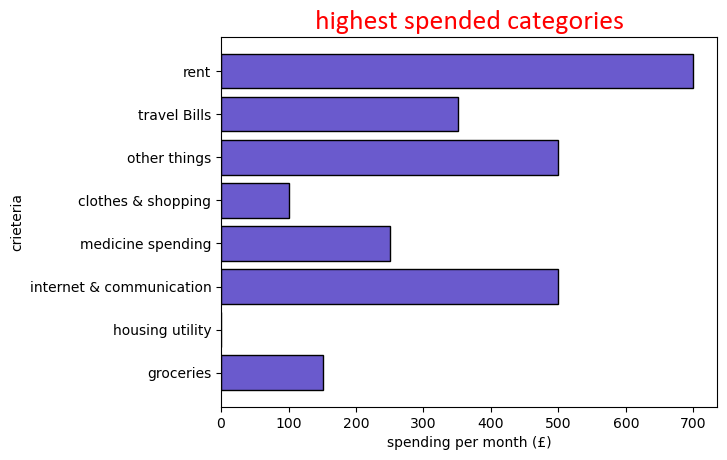

In [109]:
# highest spended place
#groceries, housing_utility, internet_and_communication, medicine_spending, clothes_and_shopping, other_things, travel_Bills, rent
def most_occ(criteria):
    unique, counts = np.unique(df[criteria], return_counts=True)
    grossavg = unique[np.where(counts == np.max(counts))[0]]
    return avg_fun(grossavg[0])
    
def avg_fun(value):
    temp = re.findall(r'\d+', value)
    spliter = list(map(int, temp))
    if len(spliter) == 2:
        avg_call = (spliter[0] + spliter[1])/2
    elif len(spliter) == 0:
        avg_call = 0
    else:
         avg_call =spliter[0]
    return avg_call

things= np.array(["groceries", "housing utility", "internet & communication", "medicine spending", "clothes & shopping", "other things", "travel Bills", "rent"])
avg_spent= np.array([most_occ("groceries"), most_occ("housing_utility"), most_occ("internet_and_communication"), most_occ("medicine_spending"), most_occ("clothes_and_shopping"), most_occ("other_things"), most_occ("travel_Bills"), most_occ("rent")])
plt.title("highest spended categories", fontdict = font1)
plt.xlabel("spending per month (£)")
plt.ylabel("crieteria")
plt.barh(things,avg_spent, color='slateblue', edgecolor ='black')
plt.show()

#downloads the current chart
# plt.savefig('highest_spended.png')

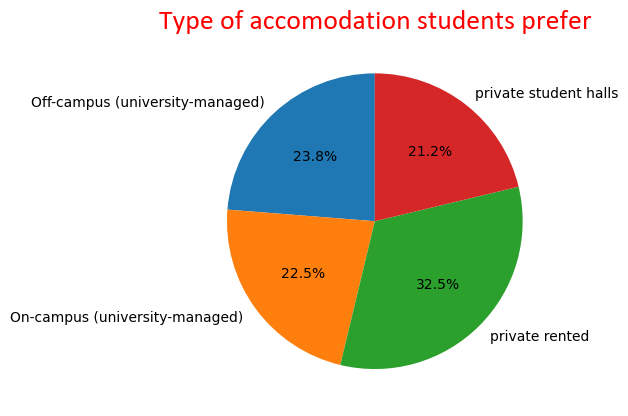

In [110]:
# which type of accomodation student prefer most
clearingfam = remove_value(df['accomodation_type'],'Family/home')
unique, counts = np.unique(clearingfam, return_counts=True)
occurance = np.array(counts)
labels = np.array(unique)

# font1 = {'family':'serif','color':'blue','size':20}

plt.title("Type of accomodation students prefer", fontdict = font1)
plt.pie(occurance, labels = labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize':10})
plt.show()

#downloads the current chart
# plt.savefig('typeofaccomodation.png')

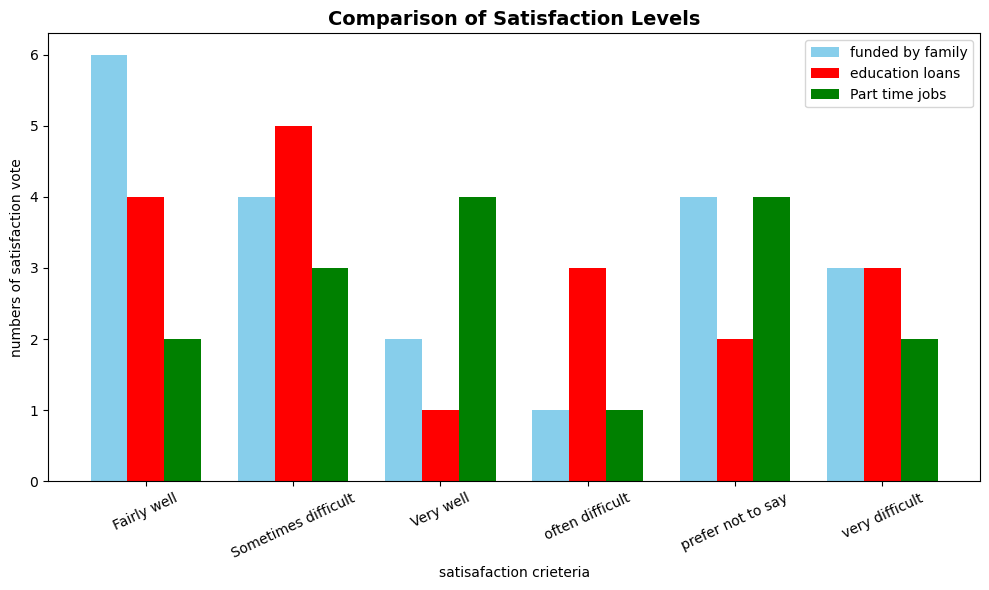

In [111]:
# funded by family and education loans of students satisafaction
family =[]
loans =[]
partsatisfaction =[]
        
for idx, x in enumerate(df['funding']):
    if x == "funded by family":
        family.append(df['manage'][idx])
    elif x == "education loans":
        loans.append(df['manage'][idx])
    elif x == "part-time job/internships":
        partsatisfaction.append(df['manage'][idx])
        
unique, counts = np.unique(family, return_counts=True)
unique1, counts1 = np.unique(loans, return_counts=True)
unique2, counts2 = np.unique(partsatisfaction, return_counts=True)

x = np.array(unique)
y = np.array(counts)
y1 = np.array(counts1)
y2 = np.array(counts2)

x_axis = np.arange(len(x))
width = 0.25

plt.figure(figsize=(10,6))
plt.bar(x_axis-width, y, width, label='funded by family', color= 'skyblue')
plt.bar(x_axis, y1, width, label='education loans', color= 'red')
plt.bar(x_axis+width, y2, width, label='Part time jobs', color= 'green')

plt.title("Comparison of Satisfaction Levels", fontsize =14,fontweight='bold')

# plt.title("satisafaction level", fontdict = font1)
plt.xlabel("satisafaction crieteria")
plt.ylabel("numbers of satisfaction vote")
plt.xticks(x_axis, x, rotation=25)
plt.legend()
plt.tight_layout()
# plt.subplot(1, 2, 2)
# plt.bar(x1,y1)
# # plt.yticks(color='w')
# plt.xticks([])
plt.show()

#downloads the current chart
# plt.savefig('familyandeducation_loans.png')

In [116]:
df[['rent', 'groceries', 'travel_Bills', 'cost_living']].describe() #numerical values summary

,rent,groceries,travel_Bills,cost_living
count,100,100,100,100
unique,8,9,9,8
top,£600-£800,£101- £200,£301- £400,£801-£1000
freq,18,14,16,16


## how much pound needed to satisfy all needs to manage per month

In [112]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

#the thing is the cost living is the sum of all the things but genralise the all the different categories and deriving value from it can give us a clear view towards the finding

X = df[['rent','groceries', 'housing_utility', 'internet_and_communication', 'travel_Bills','entertainment', 'clothes_and_shopping', 'medicine_spending','other_things']]
#ColumnTransformer will generalise the values inside the column into numeric that model can uns=derstand
preprocessor = ColumnTransformer(transformers = [    
    # the ordinal will genralise the data in the each category
    ('ord', OrdinalEncoder(categories=[
        ["staying with family", "less than £600", "£600-£800", "£801-£1000", "£1001-£1200", "£1201-£1500", "over £1500", "prefer not to say"],
        ["staying with family", "less than £100", "£101- £200", "£201- £300", "£301- £400", "£401- £500", "over £500", "not spending", "prefer not to say"],
        ["staying with family", "less than £100", "£101- £200", "£201- £300", "£301- £400", "£401- £500", "over £500", "not spending", "prefer not to say"],
        ["staying with family", "less than £100", "£101- £200", "£201- £300", "£301- £400", "£401- £500", "over £500", "not spending", "prefer not to say"],
        ["staying with family", "less than £100", "£101- £200", "£201- £300", "£301- £400", "£401- £500", "over £500", "not spending", "prefer not to say"],
        ["staying with family", "less than £100", "£101- £200", "£201- £300", "£301- £400", "£401- £500", "over £500", "not spending", "prefer not to say"],
        ["staying with family", "less than £100", "£101- £200", "£201- £300", "£301- £400", "£401- £500", "over £500", "not spending", "prefer not to say"],
        ["staying with family", "less than £100", "£101- £200", "£201- £300", "£301- £400", "£401- £500", "over £500", "not spending", "prefer not to say"],
        ["staying with family", "less than £100", "£101- £200", "£201- £300", "£301- £400", "£401- £500", "over £500", "not spending", "prefer not to say"],
]),['rent','groceries', 'housing_utility', 'internet_and_communication', 'travel_Bills','entertainment', 'clothes_and_shopping', 'medicine_spending','other_things'
   ])
])

X_processed = preprocessor.fit_transform(X)
# print(type(X_processed))
# print(X_processed.shape)

#label encoder will give text a value
y = LabelEncoder().fit_transform(df['manage'])

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

reg = LinearRegression().fit(X_train, y_train)
print("Intercept:", reg.intercept_)
print("Coefficients:", reg.coef_)


Intercept: 3.944094874600672
Coefficients: [-0.18595947 -0.0570342  -0.11421406 -0.03691601 -0.10134056  0.10005557
 -0.00184339 -0.02243491 -0.05897739]


In [113]:
#prediction
y_pred = reg.predict(X_test)
#the metrics are evaluated to see the models accuracy and how well model is performed in the linear regression
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

#MAE(mean absolute Error) is the metric should lower than 1.5
print(f"Mean Absolute Error (MAE): {mae:.2f}")
#RMSE(Root of mean squared Error) is the metric should lower than 1.5
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
#R2 should be between 0-1
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 1.70
Root Mean Squared Error (RMSE): 1.99
R² Score: -0.25


In [114]:
# due to the model performs low in the linear regression so moving to RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
ran  = RandomForestRegressor(n_estimators=300,max_depth=None,random_state=42,n_jobs=-1)

ran.fit(X_train, y_train)
y_pred1 = ran.predict(X_test)

mae1 = mean_absolute_error(y_test, y_pred1)
mse1 = mean_squared_error(y_test, y_pred1)
rmse1 = np.sqrt(mse1)
r21 = r2_score(y_test, y_pred1)

#MAE(mean absolute Error) is the metric should lower than 1.5
print(f"Mean Absolute Error (MAE): {mae1:.2f}")
#RMSE(Root of mean squared Error) is the metric should lower than 1.5
print(f"Root Mean Squared Error (RMSE): {rmse1:.2f}")
#R2 should be between 0-1
print(f"R² Score: {r21:.2f}")



Mean Absolute Error (MAE): 1.71
Root Mean Squared Error (RMSE): 1.96
R² Score: -0.21


In [115]:
gbr  = GradientBoostingRegressor(n_estimators=300,learning_rate=0.05, max_depth=4,random_state=42)

gbr.fit(X_train, y_train)
y_pred2 = gbr.predict(X_test)

mae2 = mean_absolute_error(y_test, y_pred2)
mse2 = mean_squared_error(y_test, y_pred2)
rmse2 = np.sqrt(mse2)
r22 = r2_score(y_test, y_pred2)

#MAE(mean absolute Error) is the metric should lower than 1.5
print(f"Mean Absolute Error (MAE): {mae2:.2f}")
#RMSE(Root of mean squared Error) is the metric should lower than 1.5
print(f"Root Mean Squared Error (RMSE): {mse2:.2f}")
#R2 should be between 0-1
print(f"R² Score: {r22:.2f}")

Mean Absolute Error (MAE): 1.82
Root Mean Squared Error (RMSE): 4.19
R² Score: -0.31


In [ ]:
# final thought the RandomForestRegressor done best prediction compared to other two but it does came near the correct prediction for the attempt made to the question.